<a href="https://colab.research.google.com/github/jsmcel/Castillos-/blob/main/train_embeddings_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


✅ Todas las bibliotecas instaladas correctamente
Utilizando dispositivo: cuda
🔍 Si ves 'cuda', estás usando una GPU. Si ves 'cpu', estás usando la CPU.

🔍 DIAGNÓSTICO COMPLETO DEL ENTORNO Y DATASET

📋 CONFIGURACIÓN ACTUAL:
DATA_DIR = '/content/train_images'
TEST_DIR = '/content/test_images'
OUTPUT_DIR = '/content/output'
SELECTED_CLASSES = ['talgo', 'tardienta', 'ter']
BATCH_SIZE = 16
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

📁 VERIFICACIÓN DE DIRECTORIOS:
¿Existe DATA_DIR? ✅ SÍ
¿Existe TEST_DIR? ✅ SÍ
¿Existe OUTPUT_DIR? ✅ SÍ

📂 CONTENIDO DE DIRECTORIOS DE ENTRENAMIENTO:
Carpetas en DATA_DIR: ['tardienta', 'ter', 'talgo']

Clase 'talgo':
  - Ruta: /content/train_images/talgo
  - Total archivos: 63
  - Archivos de imagen: 63
  - Prueba de imagen: ✅ Imagen válida (4096x3072)

Clase 'tardienta':
  - Ruta: /content/train_images/tardienta
  - Total archivos: 39
  - Archivos de imagen: 39
  - Prueba de imagen: ✅ Imagen válida (4096x3072)

Clase 'ter':
  - Ruta: /content/train_images/ter
  - Tot

100%|██████████| 20.5M/20.5M [00:00<00:00, 109MB/s] 


✅ Modelo efficientnet_b0 cargado y adaptado para 3 clases

🚂 INICIANDO ENTRENAMIENTO DEL MODELO

📊 VERIFICACIÓN DE DATALOADERS:
Train loader: 9 lotes (batch_size=16)
Val loader: 2 lotes (batch_size=16)

🔍 VERIFICANDO MUESTRA DE DATOS:
Forma del lote de imágenes: torch.Size([16, 3, 224, 224])
Forma de las etiquetas: torch.Size([16])
Rango de valores de las imágenes: [-2.1179, 2.6400]
Etiquetas en el lote: [0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2]

==================== Época 1/10 ====================
⏳ Iniciando entrenamiento de época 1...
✅ Primer lote cargado correctamente
  Lote 5/9 | Pérdida: 0.6636 | Precisión: 80.00% | Tiempo: 17.50s
  Lote 9/9 | Pérdida: 0.6421 | Precisión: 86.82% | Tiempo: 23.01s

⏳ Iniciando evaluación de época 1...
✅ Primer lote de validación cargado correctamente

📊 Resultados de época 1:
  Entrenamiento - Pérdida: 0.6421, Precisión: 86.82%
  Validación - Pérdida: 0.0873, Precisión: 96.88%
  💾 Guardando mejor modelo (precisión: 96.88%)

================

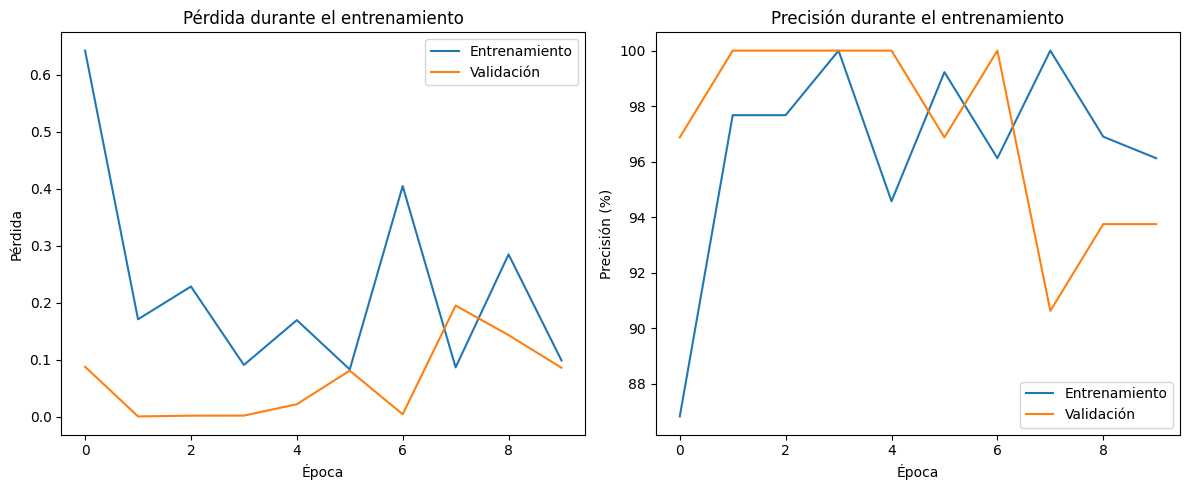

Cargando el mejor modelo desde /content/output/models/best_model.pth
Cargando dataset desde: /content/test_images
Clases seleccionadas: ['talgo', 'tardienta', 'ter']
Clases disponibles en /content/test_images: ['.ipynb_checkpoints', 'tardienta', 'ter', 'talgo', 'otros']
🔍 Filtrando solo las clases: ['talgo', 'tardienta', 'ter']
❌ Error al cargar el dataset: Found no valid file for the classes .ipynb_checkpoints. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

📦 EXPORTANDO MODELO A ONNX


Traceback (most recent call last):
  File "<ipython-input-37-3abc60935ae2>", line 206, in load_dataset
    full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/datasets/folder.py", line 328, in __init__
    super().__init__(
  File "/usr/local/lib/python3.11/dist-packages/torchvision/datasets/folder.py", line 150, in __init__
    samples = self.make_dataset(
              ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/datasets/folder.py", line 203, in make_dataset
    return make_dataset(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/datasets/folder.py", line 104, in make_dataset
    raise FileNotFoundError(msg)
FileNotFoundError: Found no valid file for the classes .ipynb_checkpoints. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .we

✅ Modelo exportado a ONNX: /content/output/models/efficientnet_model.onnx
🔍 Probando inferencia con ONNX Runtime...
✅ Inferencia con ONNX Runtime exitosa
   Forma de la salida: (1, 3)

✅ PROCESO COMPLETADO EXITOSAMENTE

📁 Archivos generados:
   - Modelo ONNX: /content/output/models/efficientnet_model.onnx
   - Embeddings: /content/output/embeddings/dataset_embeddings.json
   - Visualizaciones: /content/output/visualizations/training_curves.png

🔍 Estos archivos son necesarios para usar el script compare_image_onnx.js


In [37]:
# Entrenamiento de Modelo para Clasificación de Trenes
# ===================================================
# Este notebook entrena un modelo para clasificar imágenes de trenes
# y resolver el problema de falsos positivos

# PARTE 1: INSTALACIÓN DE DEPENDENCIAS
# ====================================
# Primero instalamos todas las bibliotecas necesarias
!pip install torch torchvision onnx onnxruntime

# Importamos las bibliotecas necesarias
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, models, transforms
import onnx
import onnxruntime

# Verificamos que todo se haya instalado correctamente
print("✅ Todas las bibliotecas instaladas correctamente")

# PARTE 2: CONFIGURACIÓN INICIAL
# =============================
# Definimos las variables de configuración
class Config:
    # Rutas (ajusta estas rutas según donde subas tus imágenes)
    DATA_DIR = "/content/train_images"
    TEST_DIR = "/content/test_images"
    OUTPUT_DIR = "/content/output"

    # Clases iniciales para el enfoque incremental
    SELECTED_CLASSES = ["talgo", "tardienta", "ter"]

    # Parámetros de entrenamiento
    BATCH_SIZE = 16
    NUM_EPOCHS = 10
    LEARNING_RATE = 0.001
    IMG_SIZE = 224

    # Parámetros del modelo
    MODEL_NAME = "efficientnet_b0"

# Creamos una instancia de la configuración
config = Config()

# Creamos las carpetas de salida si no existen
os.makedirs(os.path.join(config.OUTPUT_DIR, "models"), exist_ok=True)
os.makedirs(os.path.join(config.OUTPUT_DIR, "embeddings"), exist_ok=True)
os.makedirs(os.path.join(config.OUTPUT_DIR, "visualizations"), exist_ok=True)

# Configuramos el dispositivo (GPU o CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilizando dispositivo: {device}")
print(f"🔍 Si ves 'cuda', estás usando una GPU. Si ves 'cpu', estás usando la CPU.")

# PARTE 3: DIAGNÓSTICO DEL ENTORNO Y DATASET
# =========================================
# Verificamos que todo esté configurado correctamente
print("\n" + "="*50)
print("🔍 DIAGNÓSTICO COMPLETO DEL ENTORNO Y DATASET")
print("="*50)

# Verificar configuración
print("\n📋 CONFIGURACIÓN ACTUAL:")
print(f"DATA_DIR = '{config.DATA_DIR}'")
print(f"TEST_DIR = '{config.TEST_DIR}'")
print(f"OUTPUT_DIR = '{config.OUTPUT_DIR}'")
print(f"SELECTED_CLASSES = {config.SELECTED_CLASSES}")
print(f"BATCH_SIZE = {config.BATCH_SIZE}")
print(f"NUM_EPOCHS = {config.NUM_EPOCHS}")
print(f"LEARNING_RATE = {config.LEARNING_RATE}")

# Verificar existencia de directorios
print("\n📁 VERIFICACIÓN DE DIRECTORIOS:")
print(f"¿Existe DATA_DIR? {'✅ SÍ' if os.path.exists(config.DATA_DIR) else '❌ NO'}")
print(f"¿Existe TEST_DIR? {'✅ SÍ' if os.path.exists(config.TEST_DIR) else '❌ NO'}")
print(f"¿Existe OUTPUT_DIR? {'✅ SÍ' if os.path.exists(config.OUTPUT_DIR) else '❌ NO'}")

# Verificar contenido de directorios de entrenamiento
print("\n📂 CONTENIDO DE DIRECTORIOS DE ENTRENAMIENTO:")
if os.path.exists(config.DATA_DIR):
    all_dirs = os.listdir(config.DATA_DIR)
    print(f"Carpetas en DATA_DIR: {all_dirs}")

    for class_name in config.SELECTED_CLASSES:
        class_path = os.path.join(config.DATA_DIR, class_name)
        if os.path.exists(class_path):
            files = os.listdir(class_path)
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            print(f"\nClase '{class_name}':")
            print(f"  - Ruta: {class_path}")
            print(f"  - Total archivos: {len(files)}")
            print(f"  - Archivos de imagen: {len(image_files)}")

            # Intentar abrir una imagen para verificar que sea válida
            if image_files:
                try:
                    img_path = os.path.join(class_path, image_files[0])
                    img = Image.open(img_path)
                    print(f"  - Prueba de imagen: ✅ Imagen válida ({img.size[0]}x{img.size[1]})")
                except Exception as e:
                    print(f"  - Prueba de imagen: ❌ Error al abrir imagen: {e}")
            else:
                print(f"  - ⚠️ No hay archivos de imagen en esta carpeta")
        else:
            print(f"\n❌ La carpeta para la clase '{class_name}' no existe en {config.DATA_DIR}")

# Verificar contenido de directorios de prueba
print("\n📂 CONTENIDO DE DIRECTORIOS DE PRUEBA:")
if os.path.exists(config.TEST_DIR):
    all_dirs = os.listdir(config.TEST_DIR)
    print(f"Carpetas en TEST_DIR: {all_dirs}")

    for class_name in config.SELECTED_CLASSES + ["otros"]:
        class_path = os.path.join(config.TEST_DIR, class_name)
        if os.path.exists(class_path):
            files = os.listdir(class_path)
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            print(f"\nClase de prueba '{class_name}':")
            print(f"  - Ruta: {class_path}")
            print(f"  - Total archivos: {len(files)}")
            print(f"  - Archivos de imagen: {len(image_files)}")

            # Intentar abrir una imagen para verificar que sea válida
            if image_files:
                try:
                    img_path = os.path.join(class_path, image_files[0])
                    img = Image.open(img_path)
                    print(f"  - Prueba de imagen: ✅ Imagen válida ({img.size[0]}x{img.size[1]})")
                except Exception as e:
                    print(f"  - Prueba de imagen: ❌ Error al abrir imagen: {e}")
            else:
                print(f"  - ⚠️ No hay archivos de imagen en esta carpeta")
        else:
            print(f"\n❌ La carpeta para la clase '{class_name}' no existe en {config.TEST_DIR}")

print("\n✅ DIAGNÓSTICO COMPLETADO")
print("="*50)

# PARTE 4: PREPARACIÓN DE DATOS
# ============================
# Definimos las transformaciones para las imágenes
train_transforms = transforms.Compose([
    transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),  # Redimensionar todas las imágenes al mismo tamaño
    transforms.RandomHorizontalFlip(p=0.5),                 # Voltear horizontalmente con 50% de probabilidad
    transforms.RandomRotation(degrees=10),                  # Rotar ligeramente
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Variar colores
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),     # Pequeñas deformaciones
    transforms.ToTensor(),                                  # Convertir a tensor (formato que usa PyTorch)
    transforms.Normalize(mean=[0.485, 0.456, 0.406],        # Normalizar valores de píxeles
                         std=[0.229, 0.224, 0.225])         # (estos son valores estándar para imágenes)
])

val_transforms = transforms.Compose([
    transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),  # Redimensionar
    transforms.ToTensor(),                                  # Convertir a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],        # Normalizar
                         std=[0.229, 0.224, 0.225])
])

# Función para cargar el dataset desde carpetas
def load_dataset(data_dir, transform=None, selected_classes=None):
    """
    Carga un dataset de imágenes organizadas en carpetas por clase.

    Args:
        data_dir: Directorio con las imágenes organizadas en subcarpetas por clase
        transform: Transformaciones a aplicar a las imágenes
        selected_classes: Lista de clases específicas a incluir (None = todas)

    Returns:
        dataset: Dataset cargado
        class_names: Nombres de las clases
    """
    print(f"Cargando dataset desde: {data_dir}")
    print(f"Clases seleccionadas: {selected_classes}")

    try:
        # Si tenemos clases seleccionadas, filtramos solo esas carpetas
        if selected_classes:
            # Verificar qué clases están disponibles en el directorio
            available_classes = [d for d in os.listdir(data_dir)
                               if os.path.isdir(os.path.join(data_dir, d))]

            print(f"Clases disponibles en {data_dir}: {available_classes}")

            # Filtrar solo las clases seleccionadas que están disponibles
            valid_classes = [c for c in selected_classes if c in available_classes]

            if not valid_classes:
                print(f"⚠️ Ninguna de las clases seleccionadas {selected_classes} está disponible en {data_dir}")
                print(f"⚠️ Usando todas las clases disponibles")
                dataset = datasets.ImageFolder(root=data_dir, transform=transform)
                class_names = dataset.classes
            else:
                print(f"🔍 Filtrando solo las clases: {valid_classes}")

                # Crear un dataset personalizado con solo las clases seleccionadas
                # Primero cargamos todo el dataset para obtener la estructura
                full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

                print(f"Dataset completo cargado con clases: {full_dataset.classes}")
                print(f"Mapeo de clases a índices: {full_dataset.class_to_idx}")

                # Luego filtramos solo las clases que nos interesan
                selected_indices = [i for i, (_, label) in enumerate(full_dataset.samples)
                                  if full_dataset.classes[label] in valid_classes]

                print(f"Índices seleccionados: {len(selected_indices)} de {len(full_dataset)}")

                # Creamos un subconjunto con solo esas clases
                dataset = Subset(full_dataset, selected_indices)
                class_names = valid_classes

                print(f"✅ Dataset filtrado creado con {len(dataset)} imágenes")
                return dataset, class_names
        else:
            # Si no hay filtro, cargamos todas las clases
            dataset = datasets.ImageFolder(root=data_dir, transform=transform)
            class_names = dataset.classes

        print(f"✅ Dataset cargado con {len(dataset)} imágenes y {len(class_names)} clases")
        print(f"🏷️ Clases: {class_names}")
        return dataset, class_names

    except Exception as e:
        print(f"❌ Error al cargar el dataset: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# Función para dividir el dataset en entrenamiento y validación
def split_dataset(dataset, val_split=0.2, seed=42):
    """
    Divide un dataset en conjuntos de entrenamiento y validación.

    Args:
        dataset: Dataset completo
        val_split: Proporción para validación (0.2 = 20%)
        seed: Semilla aleatoria para reproducibilidad

    Returns:
        train_dataset: Conjunto de entrenamiento
        val_dataset: Conjunto de validación
    """
    print(f"Dividiendo dataset en entrenamiento ({1-val_split:.0%}) y validación ({val_split:.0%})")

    try:
        # Obtener índices de todas las muestras
        dataset_size = len(dataset)
        indices = list(range(dataset_size))

        # Dividir índices en entrenamiento y validación
        val_size = int(val_split * dataset_size)
        np.random.seed(seed)
        np.random.shuffle(indices)
        train_indices, val_indices = indices[val_size:], indices[:val_size]

        print(f"Dataset original: {dataset_size} imágenes")
        print(f"Índices de entrenamiento: {len(train_indices)} imágenes")
        print(f"Índices de validación: {len(val_indices)} imágenes")

        # Crear subconjuntos
        train_dataset = Subset(dataset, train_indices)
        val_dataset = Subset(dataset, val_indices)

        print(f"✅ Dataset dividido: {len(train_dataset)} imágenes para entrenamiento, {len(val_dataset)} imágenes para validación")
        return train_dataset, val_dataset

    except Exception as e:
        print(f"❌ Error al dividir el dataset: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# Función para crear dataloaders (cargadores de datos para el entrenamiento)
def create_dataloaders(train_dataset, val_dataset, batch_size=32, num_workers=2):
    """
    Crea dataloaders para entrenamiento y validación.

    Args:
        train_dataset: Conjunto de entrenamiento
        val_dataset: Conjunto de validación
        batch_size: Tamaño del lote (cuántas imágenes procesar a la vez)
        num_workers: Número de hilos para cargar datos (ajustar según CPU)

    Returns:
        train_loader: Dataloader para entrenamiento
        val_loader: Dataloader para validación
    """
    print(f"Creando dataloaders con batch_size={batch_size}, num_workers={num_workers}")

    try:
        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,              # Mezclar datos en cada época
            num_workers=num_workers,   # Hilos para cargar datos
            pin_memory=True            # Mejora rendimiento con GPU
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,             # No es necesario mezclar datos de validación
            num_workers=num_workers,
            pin_memory=True
        )

        print(f"✅ Dataloaders creados:")
        print(f"   Train loader: {len(train_loader)} lotes")
        print(f"   Val loader: {len(val_loader)} lotes")

        return train_loader, val_loader

    except Exception as e:
        print(f"❌ Error al crear dataloaders: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# PARTE 5: CARGA Y PREPARACIÓN DEL MODELO
# ======================================
# Función para cargar el modelo preentrenado
def load_model(model_name, num_classes):
    """
    Carga un modelo preentrenado y lo adapta para nuestro problema.

    Args:
        model_name: Nombre del modelo a cargar
        num_classes: Número de clases para la capa final

    Returns:
        model: Modelo adaptado
    """
    print(f"Cargando modelo {model_name} para {num_classes} clases")

    try:
        if model_name == "efficientnet_b0":
            # Cargar EfficientNet preentrenado
            model = models.efficientnet_b0(weights='DEFAULT')

            # Modificar la capa final para nuestro número de clases
            in_features = model.classifier[1].in_features
            model.classifier[1] = nn.Linear(in_features, num_classes)

        elif model_name == "resnet50":
            # Cargar ResNet50 preentrenado
            model = models.resnet50(weights='DEFAULT')

            # Modificar la capa final para nuestro número de clases
            in_features = model.fc.in_features
            model.fc = nn.Linear(in_features, num_classes)

        else:
            raise ValueError(f"Modelo {model_name} no soportado")

        # Mover modelo a GPU si está disponible
        model = model.to(device)

        print(f"✅ Modelo {model_name} cargado y adaptado para {num_classes} clases")
        return model

    except Exception as e:
        print(f"❌ Error al cargar el modelo: {e}")
        import traceback
        traceback.print_exc()
        return None

# PARTE 6: ENTRENAMIENTO DEL MODELO
# ================================
# Función para entrenar el modelo
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    """
    Entrena el modelo y muestra el progreso detallado.
    """
    print("\n" + "="*50)
    print("🚂 INICIANDO ENTRENAMIENTO DEL MODELO")
    print("="*50)

    # Verificar que los dataloaders tengan datos
    print(f"\n📊 VERIFICACIÓN DE DATALOADERS:")
    print(f"Train loader: {len(train_loader)} lotes (batch_size={config.BATCH_SIZE})")
    print(f"Val loader: {len(val_loader)} lotes (batch_size={config.BATCH_SIZE})")

    if len(train_loader) == 0:
        print("❌ ERROR: El dataloader de entrenamiento está vacío. No hay imágenes para entrenar.")
        return model

    # Verificar una muestra del dataloader
    print("\n🔍 VERIFICANDO MUESTRA DE DATOS:")
    try:
        sample_batch, sample_labels = next(iter(train_loader))
        print(f"Forma del lote de imágenes: {sample_batch.shape}")
        print(f"Forma de las etiquetas: {sample_labels.shape}")
        print(f"Rango de valores de las imágenes: [{sample_batch.min().item():.4f}, {sample_batch.max().item():.4f}]")
        print(f"Etiquetas en el lote: {sample_labels.tolist()}")
    except Exception as e:
        print(f"❌ ERROR al verificar muestra: {e}")
        import traceback
        traceback.print_exc()

    # Entrenamiento
    best_val_acc = 0.0
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        print(f"\n{'='*20} Época {epoch+1}/{num_epochs} {'='*20}")

        # Modo entrenamiento
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        batch_count = 0

        start_time = time.time()
        print(f"⏳ Iniciando entrenamiento de época {epoch+1}...")

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            batch_count += 1
            if batch_idx == 0:
                print(f"✅ Primer lote cargado correctamente")

            # Mover datos a GPU si está disponible
            inputs, labels = inputs.to(device), labels.to(device)

            # Poner gradientes a cero
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass y optimización
            loss.backward()
            optimizer.step()

            # Estadísticas
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()

            # Mostrar progreso cada 5 lotes
            if (batch_idx + 1) % 5 == 0 or (batch_idx + 1) == len(train_loader):
                elapsed_time = time.time() - start_time
                print(f"  Lote {batch_idx+1}/{len(train_loader)} | "
                      f"Pérdida: {train_loss/(batch_idx+1):.4f} | "
                      f"Precisión: {100.*train_correct/train_total:.2f}% | "
                      f"Tiempo: {elapsed_time:.2f}s")

        # Calcular estadísticas de entrenamiento
        train_loss = train_loss / batch_count if batch_count > 0 else 0
        train_acc = 100. * train_correct / train_total if train_total > 0 else 0
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Modo evaluación
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        batch_count = 0

        print(f"\n⏳ Iniciando evaluación de época {epoch+1}...")
        with torch.no_grad():
            for batch_idx, (inputs, labels) in enumerate(val_loader):
                batch_count += 1
                if batch_idx == 0:
                    print(f"✅ Primer lote de validación cargado correctamente")

                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        # Calcular estadísticas de validación
        val_loss = val_loss / batch_count if batch_count > 0 else 0
        val_acc = 100. * val_correct / val_total if val_total > 0 else 0
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        # Mostrar resultados de la época
        print(f"\n📊 Resultados de época {epoch+1}:")
        print(f"  Entrenamiento - Pérdida: {train_loss:.4f}, Precisión: {train_acc:.2f}%")
        print(f"  Validación - Pérdida: {val_loss:.4f}, Precisión: {val_acc:.2f}%")

        # Guardar el mejor modelo
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            print(f"  💾 Guardando mejor modelo (precisión: {val_acc:.2f}%)")
            torch.save(model.state_dict(), os.path.join(config.OUTPUT_DIR, 'models', 'best_model.pth'))

    print("\n✅ ENTRENAMIENTO COMPLETADO")
    print(f"Mejor precisión de validación: {best_val_acc:.2f}%")
    print("="*50)

    # Visualizar curvas de entrenamiento
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Entrenamiento')
    plt.plot(val_losses, label='Validación')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Entrenamiento')
    plt.plot(val_accs, label='Validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión (%)')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(config.OUTPUT_DIR, 'visualizations', 'training_curves.png'))
    plt.show()

    return model

# PARTE 7: EXTRACCIÓN DE EMBEDDINGS
# ===============================
# Función para extraer embeddings del modelo entrenado
def extract_embeddings(model, dataloader, class_names):
    """
    Extrae embeddings del modelo entrenado para todas las imágenes.
    """
    print("\n" + "="*50)
    print("🔍 EXTRAYENDO EMBEDDINGS")
    print("="*50)

    # Verificar que el dataloader tenga datos
    if len(dataloader) == 0:
        print("❌ ERROR: El dataloader está vacío. No hay imágenes para extraer embeddings.")
        return None, None

    # Crear un modelo truncado que devuelva los embeddings
    if isinstance(model, models.efficientnet.EfficientNet):
        # Para EfficientNet, eliminamos la capa de clasificación
        embedding_model = nn.Sequential(*list(model.children())[:-1])
    elif isinstance(model, models.resnet.ResNet):
        # Para ResNet, eliminamos la capa fully connected
        embedding_model = nn.Sequential(*list(model.children())[:-1])
    else:
        print(f"❌ Tipo de modelo no soportado para extracción de embeddings: {type(model)}")
        return None, None

    embedding_model = embedding_model.to(device)
    embedding_model.eval()

    # Extraer embeddings
    all_embeddings = []
    all_labels = []

    print("⏳ Extrayendo embeddings...")
    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(dataloader):
            if batch_idx == 0:
                print(f"✅ Primer lote cargado correctamente")

            inputs = inputs.to(device)
            outputs = embedding_model(inputs)

            # Aplanar los embeddings
            embeddings = outputs.view(outputs.size(0), -1).cpu().numpy()

            all_embeddings.append(embeddings)
            all_labels.append(labels.numpy())

            if (batch_idx + 1) % 5 == 0 or (batch_idx + 1) == len(dataloader):
                print(f"  Procesado lote {batch_idx+1}/{len(dataloader)}")

    # Concatenar todos los embeddings y etiquetas
    embeddings = np.vstack(all_embeddings)
    labels = np.concatenate(all_labels)

    print(f"✅ Embeddings extraídos: {embeddings.shape}")

    # Normalizar embeddings (L2 norm)
    from sklearn.preprocessing import normalize
    embeddings = normalize(embeddings, axis=1)

    # Crear diccionario de embeddings por clase
    embeddings_by_class = {}
    for i, label in enumerate(labels):
        class_name = class_names[label]
        if class_name not in embeddings_by_class:
            embeddings_by_class[class_name] = []
        embeddings_by_class[class_name].append(embeddings[i])

    # Calcular embedding promedio por clase
    average_embeddings = {}
    for class_name, class_embeddings in embeddings_by_class.items():
        average_embeddings[class_name] = np.mean(class_embeddings, axis=0)

    print(f"✅ Embeddings promedio calculados para {len(average_embeddings)} clases")

    # Guardar embeddings
    import json

    # Convertir embeddings a lista para poder serializarlos
    embeddings_json = {
        "embeddings": [emb.tolist() for emb in average_embeddings.values()],
        "label_names": list(average_embeddings.keys())
    }

    with open(os.path.join(config.OUTPUT_DIR, 'embeddings', 'dataset_embeddings.json'), 'w') as f:
        json.dump(embeddings_json, f)

    print(f"💾 Embeddings guardados en {os.path.join(config.OUTPUT_DIR, 'embeddings', 'dataset_embeddings.json')}")

    return embeddings, labels

# PARTE 8: EXPORTACIÓN DEL MODELO A ONNX
# ====================================
# Función para exportar el modelo a formato ONNX
def export_to_onnx(model, sample_input, output_path):
    """
    Exporta el modelo a formato ONNX para inferencia.
    """
    print("\n" + "="*50)
    print("📦 EXPORTANDO MODELO A ONNX")
    print("="*50)

    try:
        # Asegurarse de que el modelo esté en modo evaluación
        model.eval()

        # Preparar entrada de ejemplo
        dummy_input = torch.randn(1, 3, config.IMG_SIZE, config.IMG_SIZE, device=device)

        # Exportar modelo a ONNX
        torch.onnx.export(
            model,                      # Modelo a exportar
            dummy_input,                # Entrada de ejemplo
            output_path,                # Ruta de salida
            export_params=True,         # Exportar parámetros
            opset_version=12,           # Versión de ONNX
            do_constant_folding=True,   # Optimización
            input_names=['input'],      # Nombre de la entrada
            output_names=['output'],    # Nombre de la salida
            dynamic_axes={              # Ejes dinámicos (para tamaños de lote variables)
                'input': {0: 'batch_size'},
                'output': {0: 'batch_size'}
            }
        )

        # Verificar el modelo ONNX
        onnx_model = onnx.load(output_path)
        onnx.checker.check_model(onnx_model)

        print(f"✅ Modelo exportado a ONNX: {output_path}")

        # Probar inferencia con ONNX Runtime
        print("🔍 Probando inferencia con ONNX Runtime...")

        # Crear sesión de ONNX Runtime
        session = onnxruntime.InferenceSession(output_path)

        # Preparar entrada
        input_name = session.get_inputs()[0].name
        output_name = session.get_outputs()[0].name

        # Ejecutar inferencia
        dummy_input_numpy = dummy_input.cpu().numpy()
        outputs = session.run([output_name], {input_name: dummy_input_numpy})

        print(f"✅ Inferencia con ONNX Runtime exitosa")
        print(f"   Forma de la salida: {outputs[0].shape}")

        return True

    except Exception as e:
        print(f"❌ Error al exportar modelo a ONNX: {e}")
        import traceback
        traceback.print_exc()
        return False

# PARTE 9: EJECUCIÓN PRINCIPAL
# ==========================
# Cargar dataset de entrenamiento
print("\n" + "="*50)
print("🚀 INICIANDO PROCESO DE ENTRENAMIENTO")
print("="*50)

# Cargar dataset de entrenamiento
train_dataset, class_names = load_dataset(
    config.DATA_DIR,
    transform=train_transforms,
    selected_classes=config.SELECTED_CLASSES
)

if train_dataset is None or len(train_dataset) == 0:
    print("❌ ERROR: No se pudo cargar el dataset de entrenamiento o está vacío.")
else:
    # Dividir en entrenamiento y validación
    train_subset, val_subset = split_dataset(train_dataset, val_split=0.2)

    if train_subset is None or val_subset is None:
        print("❌ ERROR: No se pudo dividir el dataset.")
    else:
        # Crear dataloaders
        train_loader, val_loader = create_dataloaders(
            train_subset,
            val_subset,
            batch_size=config.BATCH_SIZE,
            num_workers=2
        )

        if train_loader is None or val_loader is None:
            print("❌ ERROR: No se pudieron crear los dataloaders.")
        else:
            # Cargar modelo
            model = load_model(config.MODEL_NAME, len(class_names))

            if model is None:
                print("❌ ERROR: No se pudo cargar el modelo.")
            else:
                # Definir criterio y optimizador
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

                # Entrenar modelo
                trained_model = train_model(
                    model,
                    train_loader,
                    val_loader,
                    criterion,
                    optimizer,
                    num_epochs=config.NUM_EPOCHS
                )

                # Cargar el mejor modelo guardado
                best_model_path = os.path.join(config.OUTPUT_DIR, 'models', 'best_model.pth')
                if os.path.exists(best_model_path):
                    print(f"Cargando el mejor modelo desde {best_model_path}")
                    model.load_state_dict(torch.load(best_model_path))

                # Extraer embeddings
                test_dataset, test_class_names = load_dataset(
                    config.TEST_DIR,
                    transform=val_transforms,
                    selected_classes=config.SELECTED_CLASSES
                )

                if test_dataset is not None and len(test_dataset) > 0:
                    test_loader = DataLoader(
                        test_dataset,
                        batch_size=config.BATCH_SIZE,
                        shuffle=False,
                        num_workers=2,
                        pin_memory=True
                    )

                    # Extraer embeddings
                    embeddings, labels = extract_embeddings(model, test_loader, test_class_names)

                # Exportar modelo a ONNX
                onnx_path = os.path.join(config.OUTPUT_DIR, 'models', 'efficientnet_model.onnx')
                export_success = export_to_onnx(model, None, onnx_path)

                if export_success:
                    print("\n" + "="*50)
                    print("✅ PROCESO COMPLETADO EXITOSAMENTE")
                    print("="*50)
                    print(f"\n📁 Archivos generados:")
                    print(f"   - Modelo ONNX: {onnx_path}")
                    print(f"   - Embeddings: {os.path.join(config.OUTPUT_DIR, 'embeddings', 'dataset_embeddings.json')}")
                    print(f"   - Visualizaciones: {os.path.join(config.OUTPUT_DIR, 'visualizations', 'training_curves.png')}")
                    print("\n🔍 Estos archivos son necesarios para usar el script compare_image_onnx.js")
                else:
                    print("\n❌ ERROR: No se pudo exportar el modelo a ONNX.")



# Entrenamiento de Modelo para Clasificación de Trenes - Versión para Principiantes

Este notebook implementa un sistema de reconocimiento visual para diferenciar entre distintos tipos de trenes mediante fotografías.
Está diseñado para ser fácil de seguir incluso si no tienes experiencia previa en deep learning.

## ¿Qué hace este notebook?
Este notebook te ayudará a crear un modelo que puede distinguir entre diferentes tipos de trenes (inicialmente TALGO, TER y TARDIENTA)
y rechazar correctamente imágenes que no pertenecen a ninguna de estas clases.

## Paso a paso:
1. Cargar imágenes de trenes organizadas en carpetas
2. Preparar las imágenes para el entrenamiento (redimensionar, aumentar datos)
3. Crear y entrenar un modelo de deep learning
4. Extraer "embeddings" (representaciones numéricas) de las imágenes
5. Evaluar qué tan bien funciona el modelo
6. Guardar el modelo para usarlo después

Autor: Manus
Fecha: Abril 2025


# # Primero, ejecuta esta celda para instalar las bibliotecas necesarias si no están ya instaladas

In [31]:
!pip install torch torchvision onnx onnxruntime scikit-learn matplotlib seaborn tqdm

In [33]:
!rm -rf /content/train_images/.ipynb_checkpoints

!pip install torch torchvision onnx onnxruntime scikit-learn matplotlib seaborn tqdm

In [15]:
!pip install onnx onnxruntime torch torchvision

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm  # Para mostrar barras de progreso
import pickle
import json
from pathlib import Path
import time
import random
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms, datasets
import torchvision.transforms.functional as TF

import onnx
import onnxruntime

def set_seed(seed=42):
    """
    Fija las semillas aleatorias para que los resultados sean reproducibles.
    Esto es importante para experimentos científicos.
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed()  # Aplicamos la configuración de semillas

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilizando dispositivo: {device}")
print(f"🔍 Si ves 'cuda', estás usando una GPU. Si ves 'cpu', estás usando la CPU.")

class Config:
    """
    Esta clase contiene todos los ajustes que usaremos para entrenar nuestro modelo.
    Puedes modificar estos valores según tus necesidades.
    """
    # Rutas (ajusta estas rutas según donde subas tus imágenes)
    DATA_DIR = "/content/train_images"  # Carpeta con imágenes de entrenamiento
    TEST_DIR = "/content/test_images"   # Carpeta con imágenes de prueba
    OUTPUT_DIR = "/content/output"      # Carpeta para guardar resultados

    # Clases iniciales para el enfoque incremental
    SELECTED_CLASSES = ["talgo", "ter", "tardienta"]  # Empezamos con estas 3 clases

    # Parámetros de entrenamiento
    BATCH_SIZE = 32            # Número de imágenes procesadas a la vez
    NUM_EPOCHS = 30            # Número máximo de pasadas completas por los datos
    LEARNING_RATE = 1e-4       # Qué tan rápido aprende el modelo (más bajo = más lento pero más estable)
    WEIGHT_DECAY = 1e-5        # Regularización para evitar sobreajuste

    # Arquitectura
    MODEL_NAME = "efficientnet"  # Modelo base (opciones: "efficientnet", "resnet50")
    EMBEDDING_SIZE = 1280        # Tamaño del embedding (depende del modelo)

    # Preprocesamiento
    IMG_SIZE = 224               # Tamaño al que redimensionaremos todas las imágenes

    # Entrenamiento
    VALIDATION_SPLIT = 0.2       # Porcentaje de datos usados para validación
    EARLY_STOPPING_PATIENCE = 5  # Cuántas épocas esperar antes de detener si no hay mejora

    # Optimización
    USE_MIXED_PRECISION = True   # Usar precisión mixta para acelerar entrenamiento

    # Exportación
    EXPORT_FORMAT = "onnx"       # Formato para exportar el modelo

config = Config()  # Creamos una instancia de la configuración

os.makedirs(config.OUTPUT_DIR, exist_ok=True)
os.makedirs(os.path.join(config.OUTPUT_DIR, "models"), exist_ok=True)
os.makedirs(os.path.join(config.OUTPUT_DIR, "embeddings"), exist_ok=True)
os.makedirs(os.path.join(config.OUTPUT_DIR, "visualizations"), exist_ok=True)

print("✅ Configuración inicial completada")

Utilizando dispositivo: cuda
🔍 Si ves 'cuda', estás usando una GPU. Si ves 'cpu', estás usando la CPU.
✅ Configuración inicial completada


# # Transformaciones para data augmentation (crear variaciones de las imágenes para mejorar el aprendizaje)

In [36]:
train_transforms = transforms.Compose([
    transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),  # Redimensionar todas las imágenes al mismo tamaño
    transforms.RandomHorizontalFlip(p=0.5),                 # Voltear horizontalmente con 50% de probabilidad
    transforms.RandomRotation(degrees=10),                  # Rotar ligeramente
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Variar colores
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),     # Pequeñas deformaciones
    transforms.ToTensor(),                                  # Convertir a tensor (formato que usa PyTorch)
    transforms.Normalize(mean=[0.485, 0.456, 0.406],        # Normalizar valores de píxeles
                         std=[0.229, 0.224, 0.225])         # (estos son valores estándar para imágenes)
])

val_transforms = transforms.Compose([
    transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),  # Redimensionar
    transforms.ToTensor(),                                  # Convertir a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],        # Normalizar
                         std=[0.229, 0.224, 0.225])
])

# Función para cargar el dataset desde carpetas
def load_dataset(data_dir, transform=None, selected_classes=None):
    """
    Carga un dataset de imágenes organizadas en carpetas por clase.

    Args:
        data_dir: Directorio con las imágenes organizadas en subcarpetas por clase
        transform: Transformaciones a aplicar a las imágenes
        selected_classes: Lista de clases específicas a incluir (None = todas)

    Returns:
        dataset: Dataset cargado
        class_names: Nombres de las clases
    """
    try:
        # Si tenemos clases seleccionadas, filtramos solo esas carpetas
        if selected_classes:
            # Verificar qué clases están disponibles en el directorio
            available_classes = [d for d in os.listdir(data_dir)
                               if os.path.isdir(os.path.join(data_dir, d))]

            print(f"Clases disponibles en {data_dir}: {available_classes}")

            # Filtrar solo las clases seleccionadas que están disponibles
            valid_classes = [c for c in selected_classes if c in available_classes]

            if not valid_classes:
                print(f"⚠️ Ninguna de las clases seleccionadas {selected_classes} está disponible en {data_dir}")
                print(f"⚠️ Usando todas las clases disponibles")
                dataset = datasets.ImageFolder(root=data_dir, transform=transform)
            else:
                print(f"🔍 Filtrando solo las clases: {valid_classes}")

                # Crear un dataset personalizado con solo las clases seleccionadas
                # Primero cargamos todo el dataset para obtener la estructura
                full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

                # Luego filtramos solo las clases que nos interesan
                selected_indices = [i for i, (_, label) in enumerate(full_dataset.samples)
                                  if full_dataset.classes[label] in valid_classes]

                # Creamos un subconjunto con solo esas clases
                from torch.utils.data import Subset
                dataset = Subset(full_dataset, selected_indices)

                # Ajustamos las clases
                dataset.classes = valid_classes
                dataset.class_to_idx = {cls: i for i, cls in enumerate(valid_classes)}

                # Para mantener la compatibilidad con ImageFolder
                class_names = valid_classes
                print(f"✅ Dataset filtrado: {len(selected_indices)} imágenes de {len(valid_classes)} clases")
                return dataset, class_names
        else:
            # Si no hay filtro, cargamos todas las clases
            dataset = datasets.ImageFolder(root=data_dir, transform=transform)

        class_names = dataset.classes
        print(f"✅ Dataset cargado con {len(dataset)} imágenes y {len(class_names)} clases")
        print(f"🏷️ Clases: {class_names}")
        return dataset, class_names

    except Exception as e:
        print(f"❌ Error al cargar el dataset: {e}")
        return None, None

# Función para dividir el dataset en entrenamiento y validación
def split_dataset(dataset, val_split=0.2, seed=42):
    """
    Divide un dataset en conjuntos de entrenamiento y validación.

    Args:
        dataset: Dataset completo
        val_split: Proporción para validación (0.2 = 20%)
        seed: Semilla aleatoria para reproducibilidad

    Returns:
        train_dataset: Conjunto de entrenamiento
        val_dataset: Conjunto de validación
    """
    # Obtener índices de todas las muestras
    indices = list(range(len(dataset)))

    # Dividir índices en entrenamiento y validación
    val_size = int(val_split * len(indices))
    np.random.seed(seed)
    np.random.shuffle(indices)
    train_indices, val_indices = indices[val_size:], indices[:val_size]

    # Crear subconjuntos
    from torch.utils.data import Subset
    train_dataset = Subset(dataset, train_indices)
    val_dataset = Subset(dataset, val_indices)

    print(f"✅ Dataset dividido: {len(train_dataset)} imágenes para entrenamiento, {len(val_dataset)} imágenes para validación")
    return train_dataset, val_dataset

# Función para crear dataloaders (cargadores de datos para el entrenamiento)
def create_dataloaders(train_dataset, val_dataset, batch_size=32, num_workers=2):
    """
    Crea dataloaders para entrenamiento y validación.

    Args:
        train_dataset: Conjunto de entrenamiento
        val_dataset: Conjunto de validación
        batch_size: Tamaño del lote (cuántas imágenes procesar a la vez)
        num_workers: Número de hilos para cargar datos (ajustar según CPU)

    Returns:
        train_loader: Dataloader para entrenamiento
        val_loader: Dataloader para validación
    """
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,              # Mezclar datos en cada época
        num_workers=num_workers,   # Hilos para cargar datos
        pin_memory=True            # Mejora rendimiento con GPU
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,             # No es necesario mezclar datos de validación
        num_workers=num_workers,
        pin_memory=True
    )

    return train_loader, val_loader

print("✅ Funciones de preparación de datos definidas")

✅ Funciones de preparación de datos definidas


In [20]:
# Primero definimos las variables de configuración
DATA_DIR = "/content/train_images"
TEST_DIR = "/content/test_images"
OUTPUT_DIR = "/content/output"
SELECTED_CLASSES = ["talgo", "tardienta", "ter"]
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

# Ahora ejecutamos el diagnóstico
import os
import glob
from PIL import Image
import time

print("="*50)
print("🔍 DIAGNÓSTICO COMPLETO DEL ENTORNO Y DATASET")
print("="*50)

# Verificar configuración
print("\n📋 CONFIGURACIÓN ACTUAL:")
print(f"DATA_DIR = '{DATA_DIR}'")
print(f"TEST_DIR = '{TEST_DIR}'")
print(f"OUTPUT_DIR = '{OUTPUT_DIR}'")
print(f"SELECTED_CLASSES = {SELECTED_CLASSES}")
print(f"BATCH_SIZE = {BATCH_SIZE}")
print(f"NUM_EPOCHS = {NUM_EPOCHS}")
print(f"LEARNING_RATE = {LEARNING_RATE}")

# Verificar existencia de directorios
print("\n📁 VERIFICACIÓN DE DIRECTORIOS:")
print(f"¿Existe DATA_DIR? {'✅ SÍ' if os.path.exists(DATA_DIR) else '❌ NO'}")
print(f"¿Existe TEST_DIR? {'✅ SÍ' if os.path.exists(TEST_DIR) else '❌ NO'}")
print(f"¿Existe OUTPUT_DIR? {'✅ SÍ' if os.path.exists(OUTPUT_DIR) else '❌ NO'}")

# Verificar contenido de directorios de entrenamiento
print("\n📂 CONTENIDO DE DIRECTORIOS DE ENTRENAMIENTO:")
if os.path.exists(DATA_DIR):
    all_dirs = os.listdir(DATA_DIR)
    print(f"Carpetas en DATA_DIR: {all_dirs}")

    for class_name in SELECTED_CLASSES:
        class_path = os.path.join(DATA_DIR, class_name)
        if os.path.exists(class_path):
            files = os.listdir(class_path)
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            print(f"\nClase '{class_name}':")
            print(f"  - Ruta: {class_path}")
            print(f"  - Total archivos: {len(files)}")
            print(f"  - Archivos de imagen: {len(image_files)}")

            # Intentar abrir una imagen para verificar que sea válida
            if image_files:
                try:
                    img_path = os.path.join(class_path, image_files[0])
                    img = Image.open(img_path)
                    print(f"  - Prueba de imagen: ✅ Imagen válida ({img.size[0]}x{img.size[1]})")
                except Exception as e:
                    print(f"  - Prueba de imagen: ❌ Error al abrir imagen: {e}")
            else:
                print(f"  - ⚠️ No hay archivos de imagen en esta carpeta")
        else:
            print(f"\n❌ La carpeta para la clase '{class_name}' no existe en {DATA_DIR}")

# Verificar contenido de directorios de prueba
print("\n📂 CONTENIDO DE DIRECTORIOS DE PRUEBA:")
if os.path.exists(TEST_DIR):
    all_dirs = os.listdir(TEST_DIR)
    print(f"Carpetas en TEST_DIR: {all_dirs}")

    for class_name in SELECTED_CLASSES + ["otros"]:
        class_path = os.path.join(TEST_DIR, class_name)
        if os.path.exists(class_path):
            files = os.listdir(class_path)
            image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            print(f"\nClase de prueba '{class_name}':")
            print(f"  - Ruta: {class_path}")
            print(f"  - Total archivos: {len(files)}")
            print(f"  - Archivos de imagen: {len(image_files)}")

            # Intentar abrir una imagen para verificar que sea válida
            if image_files:
                try:
                    img_path = os.path.join(class_path, image_files[0])
                    img = Image.open(img_path)
                    print(f"  - Prueba de imagen: ✅ Imagen válida ({img.size[0]}x{img.size[1]})")
                except Exception as e:
                    print(f"  - Prueba de imagen: ❌ Error al abrir imagen: {e}")
            else:
                print(f"  - ⚠️ No hay archivos de imagen en esta carpeta")
        else:
            print(f"\n❌ La carpeta para la clase '{class_name}' no existe en {TEST_DIR}")

print("\n✅ DIAGNÓSTICO COMPLETADO")
print("="*50)



🔍 DIAGNÓSTICO COMPLETO DEL ENTORNO Y DATASET

📋 CONFIGURACIÓN ACTUAL:
DATA_DIR = '/content/train_images'
TEST_DIR = '/content/test_images'
OUTPUT_DIR = '/content/output'
SELECTED_CLASSES = ['talgo', 'tardienta', 'ter']
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

📁 VERIFICACIÓN DE DIRECTORIOS:
¿Existe DATA_DIR? ✅ SÍ
¿Existe TEST_DIR? ✅ SÍ
¿Existe OUTPUT_DIR? ✅ SÍ

📂 CONTENIDO DE DIRECTORIOS DE ENTRENAMIENTO:
Carpetas en DATA_DIR: ['.ipynb_checkpoints', 'tardienta', 'ter', 'talgo']

Clase 'talgo':
  - Ruta: /content/train_images/talgo
  - Total archivos: 63
  - Archivos de imagen: 63
  - Prueba de imagen: ✅ Imagen válida (4096x3072)

Clase 'tardienta':
  - Ruta: /content/train_images/tardienta
  - Total archivos: 39
  - Archivos de imagen: 39
  - Prueba de imagen: ✅ Imagen válida (4096x3072)

Clase 'ter':
  - Ruta: /content/train_images/ter
  - Total archivos: 60
  - Archivos de imagen: 59
  - Prueba de imagen: ✅ Imagen válida (4096x3072)

📂 CONTENIDO DE DIRECTORIOS DE PRUEBA:

# # Clase para el modelo de embeddings

In [21]:
class EmbeddingModel(nn.Module):
    """
    Modelo para extraer embeddings y clasificar imágenes.

    Este modelo usa una red pre-entrenada (backbone) para extraer características,
    y luego añade una capa de clasificación para nuestras clases específicas.
    """
    def __init__(self, model_name, num_classes, embedding_size=None, pretrained=True):
        """
        Inicializa el modelo.

        Args:
            model_name: Nombre del modelo base ("efficientnet", "resnet50")
            num_classes: Número de clases a clasificar
            embedding_size: Tamaño del embedding (si None, se determina automáticamente)
            pretrained: Si usar pesos pre-entrenados (transfer learning)
        """
        super(EmbeddingModel, self).__init__()
        self.model_name = model_name
        self.embedding_size = embedding_size

        # Seleccionar backbone según el modelo especificado
        if model_name == "efficientnet":
            # EfficientNet es un modelo moderno y eficiente
            self.backbone = models.efficientnet_b0(pretrained=pretrained)
            self.embedding_size = self.backbone.classifier[1].in_features
            self.backbone.classifier = nn.Identity()  # Quitamos la capa de clasificación original

        elif model_name == "resnet50":
            # ResNet50 es un modelo clásico muy potente
            self.backbone = models.resnet50(pretrained=pretrained)
            self.embedding_size = self.backbone.fc.in_features
            self.backbone.fc = nn.Identity()  # Quitamos la capa de clasificación original

        else:
            raise ValueError(f"❌ Modelo {model_name} no soportado")

        # Capa de clasificación para nuestras clases específicas
        self.classifier = nn.Linear(self.embedding_size, num_classes)

        # Normalización L2 para embeddings (hace que la comparación por similitud funcione mejor)
        self.normalize = lambda x: F.normalize(x, p=2, dim=1)

    def forward(self, x, return_embeddings=False):
        """
        Pasa una imagen por el modelo.

        Args:
            x: Tensor de imagen de entrada
            return_embeddings: Si devolver también los embeddings

        Returns:
            logits: Puntuaciones para cada clase
            embeddings: (Opcional) Embeddings normalizados
        """
        # Extraer características usando el backbone
        embeddings = self.backbone(x)

        # Normalizar embeddings (para que tengan norma 1)
        normalized_embeddings = self.normalize(embeddings)

        # Clasificación
        logits = self.classifier(normalized_embeddings)

        if return_embeddings:
            return logits, normalized_embeddings
        else:
            return logits

    def extract_embeddings(self, x):
        """
        Extrae embeddings normalizados de una imagen.

        Args:
            x: Tensor de imagen de entrada

        Returns:
            normalized_embeddings: Embeddings normalizados
        """
        self.eval()  # Poner modelo en modo evaluación
        with torch.no_grad():  # No calcular gradientes (más eficiente)
            embeddings = self.backbone(x)
            normalized_embeddings = self.normalize(embeddings)
        return normalized_embeddings

print("✅ Modelo definido")

✅ Modelo definido


In [28]:
# DIAGNÓSTICO FORZADO DEL PROCESO DE ENTRENAMIENTO
print("\n" + "="*50)
print("🔍 DIAGNÓSTICO FORZADO DEL PROCESO DE ENTRENAMIENTO")
print("="*50)

# 1. Verificar que los datasets se carguen correctamente
print("\n1️⃣ VERIFICANDO CARGA DE DATASETS:")
try:
    print(f"Intentando cargar dataset de entrenamiento desde: {DATA_DIR}")
    train_dataset, class_names = load_dataset(DATA_DIR, transform=train_transforms, selected_classes=SELECTED_CLASSES)
    print(f"✅ Dataset de entrenamiento cargado: {train_dataset}")

    if hasattr(train_dataset, '__len__'):
        print(f"   Tamaño del dataset: {len(train_dataset)} imágenes")
    else:
        print(f"   El dataset no tiene método __len__, verificando si es un Subset")
        if hasattr(train_dataset, 'dataset') and hasattr(train_dataset, 'indices'):
            print(f"   Es un Subset con {len(train_dataset.indices)} imágenes")

    print(f"   Clases: {class_names}")
except Exception as e:
    print(f"❌ ERROR al cargar dataset de entrenamiento: {e}")
    import traceback
    traceback.print_exc()

# 2. Verificar la división train/val
print("\n2️⃣ VERIFICANDO DIVISIÓN TRAIN/VAL:")
try:
    if 'train_dataset' in locals():
        print(f"Dividiendo dataset en entrenamiento y validación...")
        train_subset, val_subset = split_dataset(train_dataset, val_split=0.2)
        print(f"✅ División completada:")
        print(f"   Train subset: {len(train_subset)} imágenes")
        print(f"   Val subset: {len(val_subset)} imágenes")
    else:
        print("❌ No se puede dividir porque el dataset de entrenamiento no se cargó correctamente")
except Exception as e:
    print(f"❌ ERROR al dividir dataset: {e}")
    import traceback
    traceback.print_exc()

# 3. Verificar la creación de dataloaders
print("\n3️⃣ VERIFICANDO CREACIÓN DE DATALOADERS:")
try:
    if 'train_subset' in locals() and 'val_subset' in locals():
        print(f"Creando dataloaders con batch_size={BATCH_SIZE}...")
        train_loader, val_loader = create_dataloaders(train_subset, val_subset, batch_size=BATCH_SIZE)
        print(f"✅ Dataloaders creados:")
        print(f"   Train loader: {len(train_loader)} lotes")
        print(f"   Val loader: {len(val_loader)} lotes")
    else:
        print("❌ No se pueden crear dataloaders porque la división train/val no se completó correctamente")
except Exception as e:
    print(f"❌ ERROR al crear dataloaders: {e}")
    import traceback
    traceback.print_exc()

# 4. Verificar una muestra del dataloader
print("\n4️⃣ VERIFICANDO MUESTRA DE DATOS:")
try:
    if 'train_loader' in locals():
        print(f"Intentando obtener una muestra del dataloader...")
        train_iter = iter(train_loader)
        sample_batch, sample_labels = next(train_iter)
        print(f"✅ Muestra obtenida:")
        print(f"   Forma del lote de imágenes: {sample_batch.shape}")
        print(f"   Forma de las etiquetas: {sample_labels.shape}")
        print(f"   Rango de valores de las imágenes: [{sample_batch.min().item():.4f}, {sample_batch.max().item():.4f}]")
        print(f"   Etiquetas en el lote: {sample_labels.tolist()}")
    else:
        print("❌ No se puede obtener muestra porque el dataloader no se creó correctamente")
except Exception as e:
    print(f"❌ ERROR al obtener muestra: {e}")
    import traceback
    traceback.print_exc()

print("\n✅ DIAGNÓSTICO FORZADO COMPLETADO")
print("="*50)



🔍 DIAGNÓSTICO FORZADO DEL PROCESO DE ENTRENAMIENTO

1️⃣ VERIFICANDO CARGA DE DATASETS:
Intentando cargar dataset de entrenamiento desde: /content/train_images
Clases disponibles en /content/train_images: ['.ipynb_checkpoints', 'tardienta', 'ter', 'talgo']
🔍 Filtrando solo las clases: ['talgo', 'tardienta', 'ter']
❌ Error al cargar el dataset: Found no valid file for the classes .ipynb_checkpoints. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp
✅ Dataset de entrenamiento cargado: None
   El dataset no tiene método __len__, verificando si es un Subset
   Clases: None

2️⃣ VERIFICANDO DIVISIÓN TRAIN/VAL:
Dividiendo dataset en entrenamiento y validación...
❌ ERROR al dividir dataset: object of type 'NoneType' has no len()

3️⃣ VERIFICANDO CREACIÓN DE DATALOADERS:
❌ No se pueden crear dataloaders porque la división train/val no se completó correctamente

4️⃣ VERIFICANDO MUESTRA DE DATOS:
❌ No se puede obtener muestra porque el dataloader no se creó correc

Traceback (most recent call last):
  File "<ipython-input-28-ec0a24105428>", line 31, in <cell line: 0>
    train_subset, val_subset = split_dataset(train_dataset, val_split=0.2)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-18-5dcbc842463d>", line 100, in split_dataset
    indices = list(range(len(dataset)))
                         ^^^^^^^^^^^^
TypeError: object of type 'NoneType' has no len()


# # Función para entrenar el modelo

In [27]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    """
    Entrena el modelo y muestra el progreso detallado.

  """
    print("\n🚂 INICIANDO ENTRENAMIENTO DEL MODELO - VERIFICACIÓN INMEDIATA")

    # Verificación inmediata de los dataloaders
    print(f"Train loader tiene {len(train_loader)} lotes")
    print(f"Val loader tiene {len(val_loader)} lotes")

    # Verificar si hay datos en los loaders
    if len(train_loader) == 0:
        print("❌ ERROR CRÍTICO: El dataloader de entrenamiento está vacío")
        return model
    print("\n" + "="*50)
    print("🚂 INICIANDO ENTRENAMIENTO DEL MODELO")
    print("="*50)

    # Verificar que los dataloaders tengan datos
    print(f"\n📊 VERIFICACIÓN DE DATALOADERS:")
    print(f"Train loader: {len(train_loader)} lotes (batch_size={BATCH_SIZE})")
    print(f"Val loader: {len(val_loader)} lotes (batch_size={BATCH_SIZE})")

    if len(train_loader) == 0:
        print("❌ ERROR: El dataloader de entrenamiento está vacío. No hay imágenes para entrenar.")
        return model

    # Verificar una muestra del dataloader
    print("\n🔍 VERIFICANDO MUESTRA DE DATOS:")
    try:
        sample_batch, sample_labels = next(iter(train_loader))
        print(f"Forma del lote de imágenes: {sample_batch.shape}")
        print(f"Forma de las etiquetas: {sample_labels.shape}")
        print(f"Rango de valores de las imágenes: [{sample_batch.min().item():.4f}, {sample_batch.max().item():.4f}]")
        print(f"Etiquetas en el lote: {sample_labels.tolist()}")
    except Exception as e:
        print(f"❌ ERROR al verificar muestra: {e}")

    # Resto del código de entrenamiento con logs detallados...
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        print(f"\n{'='*20} Época {epoch+1}/{num_epochs} {'='*20}")

        # Modo entrenamiento
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        batch_count = 0

        start_time = time.time()
        print(f"⏳ Iniciando entrenamiento de época {epoch+1}...")

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            batch_count += 1
            if batch_idx == 0:
                print(f"✅ Primer lote cargado correctamente")

            # Mover datos a GPU si está disponible
            inputs, labels = inputs.to(device), labels.to(device)

            # Poner gradientes a cero
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass y optimización
            loss.backward()
            optimizer.step()

            # Estadísticas
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()

            # Mostrar progreso cada 5 lotes
            if (batch_idx + 1) % 5 == 0 or (batch_idx + 1) == len(train_loader):
                elapsed_time = time.time() - start_time
                print(f"  Lote {batch_idx+1}/{len(train_loader)} | "
                      f"Pérdida: {train_loss/(batch_idx+1):.4f} | "
                      f"Precisión: {100.*train_correct/train_total:.2f}% | "
                      f"Tiempo: {elapsed_time:.2f}s")

        # Calcular estadísticas de entrenamiento
        train_loss = train_loss / batch_count
        train_acc = 100. * train_correct / train_total

        # Modo evaluación
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        batch_count = 0

        print(f"\n⏳ Iniciando evaluación de época {epoch+1}...")
        with torch.no_grad():
            for batch_idx, (inputs, labels) in enumerate(val_loader):
                batch_count += 1
                if batch_idx == 0:
                    print(f"✅ Primer lote de validación cargado correctamente")

                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        # Calcular estadísticas de validación
        val_loss = val_loss / batch_count if batch_count > 0 else 0
        val_acc = 100. * val_correct / val_total if val_total > 0 else 0

        # Mostrar resultados de la época
        print(f"\n📊 Resultados de época {epoch+1}:")
        print(f"  Entrenamiento - Pérdida: {train_loss:.4f}, Precisión: {train_acc:.2f}%")
        print(f"  Validación - Pérdida: {val_loss:.4f}, Precisión: {val_acc:.2f}%")

        # Guardar el mejor modelo
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            print(f"  💾 Guardando mejor modelo (precisión: {val_acc:.2f}%)")
            torch.save(model.state_dict(), os.path.join(OUTPUT_DIR, 'models', 'best_model.pth'))

    print("\n✅ ENTRENAMIENTO COMPLETADO")
    print(f"Mejor precisión de validación: {best_val_acc:.2f}%")
    print("="*50)

    return model


# # Función para visualizar la matriz de confusión

In [9]:
# Función para visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, class_names, output_path=None):
    """
    Genera y guarda una matriz de confusión.

    La matriz de confusión muestra cuántas veces el modelo predijo cada clase
    para cada clase real, lo que ayuda a identificar errores comunes.

    Args:
        y_true: Etiquetas reales
        y_pred: Predicciones del modelo
        class_names: Nombres de las clases
        output_path: Ruta para guardar la imagen
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')

    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
        print(f"✅ Matriz de confusión guardada en {output_path}")

    plt.show()

# Función para visualizar el historial de entrenamiento
def plot_training_history(history, output_path=None):
    """
    Visualiza el historial de entrenamiento.

    Muestra gráficos de pérdida y precisión durante el entrenamiento.

    Args:
        history: Diccionario con historial de entrenamiento
        output_path: Ruta para guardar la imagen
    """
    plt.figure(figsize=(12, 5))

    # Gráfico de pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Entrenamiento')
    plt.plot(history['val_loss'], label='Validación')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    # Gráfico de precisión
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Entrenamiento')
    plt.plot(history['val_acc'], label='Validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
        print(f"✅ Historial de entrenamiento guardado en {output_path}")

    plt.show()

# Función para extraer embeddings del dataset
def extract_dataset_embeddings(model, dataloader, device):
    """
    Extrae embeddings de todas las imágenes en un dataloader.

    Args:
        model: Modelo entrenado
        dataloader: Dataloader con imágenes
        device: Dispositivo (CPU o GPU)

    Returns:
        all_embeddings: Embeddings extraídos
        all_labels: Etiquetas correspondientes
    """
    model.eval()  # Poner modelo en modo evaluación
    all_embeddings = []
    all_labels = []

    with torch.no_grad():  # No calcular gradientes
        for inputs, labels in tqdm(dataloader, desc="Extrayendo embeddings"):
            inputs = inputs.to(device)

            # Extraer embeddings
            embeddings = model.extract_embeddings(inputs)

            # Guardar resultados
            all_embeddings.append(embeddings.cpu().numpy())
            all_labels.append(labels.numpy())

    # Concatenar resultados
    all_embeddings = np.vstack(all_embeddings)
    all_labels = np.concatenate(all_labels)

    print(f"✅ Extraídos {len(all_embeddings)} embeddings")
    return all_embeddings, all_labels

# Función para guardar embeddings
def save_embeddings(embeddings, labels, class_names, output_path):
    """
    Guarda embeddings y etiquetas en un archivo.

    Args:
        embeddings: Embeddings extraídos
        labels: Etiquetas correspondientes
        class_names: Nombres de las clases
        output_path: Ruta para guardar el archivo
    """
    # Convertir etiquetas numéricas a nombres de clase
    label_names = [class_names[label] for label in labels]

    # Crear diccionario con embeddings y etiquetas
    data = {
        'embeddings': embeddings.tolist(),
        'labels': labels.tolist(),
        'label_names': label_names,
        'class_names': class_names
    }

    # Guardar en formato JSON
    with open(output_path, 'w') as f:
        json.dump(data, f)

    print(f"✅ Embeddings guardados en {output_path}")

# Función para visualizar embeddings con t-SNE
def visualize_embeddings_tsne(embeddings, labels, class_names, output_path=None, perplexity=30, n_iter=1000):
    """
    Visualiza embeddings usando t-SNE.

    t-SNE es una técnica para visualizar datos de alta dimensión en 2D.
    Nos permite ver si los embeddings de diferentes clases están bien separados.

    Args:
        embeddings: Embeddings extraídos
        labels: Etiquetas correspondientes
        class_names: Nombres de las clases
        output_path: Ruta para guardar la imagen
        perplexity: Parámetro de t-SNE (30 es un buen valor por defecto)
        n_iter: Número de iteraciones para t-SNE
    """
    from sklearn.manifold import TSNE

    # Reducir dimensionalidad con t-SNE
    print("🔄 Aplicando t-SNE para visualizar embeddings (esto puede tardar un poco)...")
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Crear DataFrame para visualización
    df = pd.DataFrame({
        'x': embeddings_2d[:, 0],
        'y': embeddings_2d[:, 1],
        'label': [class_names[label] for label in labels]
    })

    # Visualizar
    plt.figure(figsize=(12, 10))
    sns.scatterplot(data=df, x='x', y='y', hue='label', palette='tab20', s=100, alpha=0.7)
    plt.title('Visualización de Embeddings con t-SNE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
        print(f"✅ Visualización t-SNE guardada en {output_path}")

    plt.show()

# Función para evaluar la similitud entre embeddings
def evaluate_embedding_similarity(embeddings, labels, class_names, metric='cosine'):
    """
    Evalúa la similitud entre embeddings de la misma clase y de clases diferentes.

    Esta función es crucial para entender si nuestros embeddings son discriminativos.
    Idealmente, la similitud intra-clase (misma clase) debería ser alta,
    y la similitud inter-clase (clases diferentes) debería ser baja.

    Args:
        embeddings: Embeddings extraídos
        labels: Etiquetas correspondientes
        class_names: Nombres de las clases
        metric: Métrica de similitud ('cosine' o 'euclidean')

    Returns:
        stats: Estadísticas de similitud
    """
    # Calcular matriz de similitud
    if metric == 'cosine':
        similarity_matrix = cosine_similarity(embeddings)
    elif metric == 'euclidean':
        # Convertir distancia a similitud (valores más altos = más similares)
        distance_matrix = euclidean_distances(embeddings)
        max_distance = np.max(distance_matrix)
        similarity_matrix = 1 - (distance_matrix / max_distance)
    else:
        raise ValueError(f"❌ Métrica {metric} no soportada")

    # Calcular similitud intra-clase e inter-clase
    intra_class_similarities = []  # Similitudes entre imágenes de la misma clase
    inter_class_similarities = []  # Similitudes entre imágenes de clases diferentes

    for i in range(len(labels)):
        for j in range(i+1, len(labels)):
            if labels[i] == labels[j]:
                intra_class_similarities.append(similarity_matrix[i, j])
            else:
                inter_class_similarities.append(similarity_matrix[i, j])

    # Convertir a arrays
    intra_class_similarities = np.array(intra_class_similarities)
    inter_class_similarities = np.array(inter_class_similarities)

    # Calcular estadísticas
    stats = {
        'intra_class_mean': np.mean(intra_class_similarities),
        'intra_class_std': np.std(intra_class_similarities),
        'intra_class_min': np.min(intra_class_similarities),
        'intra_class_max': np.max(intra_class_similarities),
        'inter_class_mean': np.mean(inter_class_similarities),
        'inter_class_std': np.std(inter_class_similarities),
        'inter_class_min': np.min(inter_class_similarities),
        'inter_class_max': np.max(inter_class_similarities),
    }

    # Visualizar distribuciones
    plt.figure(figsize=(10, 6))
    sns.histplot(intra_class_similarities, kde=True, label='Intra-clase', alpha=0.6)
    sns.histplot(inter_class_similarities, kde=True, label='Inter-clase', alpha=0.6)
    plt.title(f'Distribución de Similitud ({metric})')
    plt.xlabel('Similitud')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

    # Imprimir estadísticas
    print(f"📊 Estadísticas de similitud ({metric}):")
    print(f"📈 Intra-clase (misma clase): Media={stats['intra_class_mean']:.4f}, Std={stats['intra_class_std']:.4f}, Min={stats['intra_class_min']:.4f}, Max={stats['intra_class_max']:.4f}")
    print(f"📉 Inter-clase (clases diferentes): Media={stats['inter_class_mean']:.4f}, Std={stats['inter_class_std']:.4f}, Min={stats['inter_class_min']:.4f}, Max={stats['inter_class_max']:.4f}")

    # Evaluar si hay buena separación
    if stats['intra_class_mean'] > stats['inter_class_mean'] + stats['inter_class_std']:
        print("✅ ¡Buena separación! Los embeddings de la misma clase son significativamente más similares entre sí que con otras clases.")
    else:
        print("⚠️ Separación insuficiente. Considera entrenar por más épocas o ajustar hiperparámetros.")

    return stats

# Función para evaluar la capacidad de rechazar imágenes negativas
def evaluate_negative_rejection(model, negative_loader, class_names, device, threshold=0.5):
    """
    Evalúa la capacidad del modelo para rechazar imágenes que no pertenecen a ninguna clase.

    Args:
        model: Modelo entrenado
        negative_loader: Dataloader con imágenes negativas
        class_names: Nombres de las clases
        device: Dispositivo (CPU o GPU)
        threshold: Umbral de confianza para considerar una predicción válida

    Returns:
        rejection_rate: Tasa de rechazo (porcentaje de imágenes correctamente rechazadas)
        confidences: Confianzas para las imágenes negativas
    """
    model.eval()
    all_confidences = []
    rejected = 0
    total = 0

    with torch.no_grad():
        for inputs, _ in tqdm(negative_loader, desc="Evaluando rechazo de negativos"):
            inputs = inputs.to(device)

            # Obtener predicciones
            outputs = model(inputs)
            confidences = F.softmax(outputs, dim=1)

            # Obtener máxima confianza para cada imagen
            max_confidences, _ = confidences.max(1)

            # Contar cuántas imágenes son rechazadas (confianza < threshold)
            rejected += (max_confidences < threshold).sum().item()
            total += inputs.size(0)

            # Guardar confianzas
            all_confidences.extend(max_confidences.cpu().numpy())

    # Calcular tasa de rechazo
    rejection_rate = rejected / total if total > 0 else 0

    # Visualizar distribución de confianzas
    plt.figure(figsize=(10, 6))
    sns.histplot(all_confidences, kde=True, bins=20)
    plt.axvline(x=threshold, color='r', linestyle='--', label=f'Umbral ({threshold})')
    plt.title('Distribución de Confianzas para Imágenes Negativas')
    plt.xlabel('Confianza Máxima')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

    # Imprimir resultados
    print(f"📊 Tasa de rechazo: {rejection_rate:.4f} ({rejected} de {total} imágenes rechazadas)")
    print(f"📊 Confianza media: {np.mean(all_confidences):.4f}")
    print(f"📊 Confianza máxima: {np.max(all_confidences):.4f}")
    print(f"📊 Confianza mínima: {np.min(all_confidences):.4f}")

    if rejection_rate > 0.9:
        print("✅ ¡Excelente rechazo de negativos!")
    elif rejection_rate > 0.7:
        print("✅ Buen rechazo de negativos.")
    else:
        print("⚠️ Rechazo de negativos insuficiente. Considera ajustar el umbral o mejorar el modelo.")

    return rejection_rate, all_confidences

print("✅ Funciones de evaluación y visualización definidas")

✅ Funciones de evaluación y visualización definidas


# # Función para exportar modelo a ONNX

In [10]:
# Función para exportar modelo a ONNX
def export_to_onnx(model, input_shape, output_path):
    """
    Exporta un modelo PyTorch a formato ONNX.

    ONNX es un formato estándar que permite usar el modelo en diferentes plataformas.

    Args:
        model: Modelo entrenado
        input_shape: Forma de la entrada (ej. (3, 224, 224) para imágenes RGB)
        output_path: Ruta para guardar el modelo ONNX

    Returns:
        output_path: Ruta del modelo ONNX guardado
    """
    # Crear tensor de ejemplo
    dummy_input = torch.randn(1, *input_shape, device=device)

    # Poner modelo en modo evaluación
    model.eval()

    # Exportar modelo
    torch.onnx.export(
        model,
        dummy_input,
        output_path,
        export_params=True,
        opset_version=12,
        do_constant_folding=True,
        input_names=['input'],
        output_names=['output'],
        dynamic_axes={'input': {0: 'batch_size'},
                      'output': {0: 'batch_size'}}
    )

    # Verificar modelo ONNX
    onnx_model = onnx.load(output_path)
    onnx.checker.check_model(onnx_model)

    print(f"✅ Modelo exportado a ONNX: {output_path}")
    return output_path

# Función para probar inferencia con ONNX
def test_onnx_inference(onnx_path, test_image_path, class_names, transform=None):
    """
    Prueba inferencia con un modelo ONNX.

    Args:
        onnx_path: Ruta del modelo ONNX
        test_image_path: Ruta de la imagen de prueba
        class_names: Nombres de las clases
        transform: Transformaciones a aplicar a la imagen

    Returns:
        pred_class: Clase predicha
        confidence: Confianza de la predicción
        inference_time: Tiempo de inferencia
    """
    from PIL import Image

    # Cargar imagen
    img = Image.open(test_image_path).convert('RGB')

    # Aplicar transformaciones
    if transform is None:
        transform = val_transforms

    img_tensor = transform(img).unsqueeze(0).numpy()

    # Crear sesión ONNX
    session = onnxruntime.InferenceSession(onnx_path)

    # Obtener nombres de entradas y salidas
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # Realizar inferencia
    start_time = time.time()
    outputs = session.run([output_name], {input_name: img_tensor})
    inference_time = time.time() - start_time

    # Obtener predicción
    probs = outputs[0][0]
    pred_idx = np.argmax(probs)
    pred_class = class_names[pred_idx]
    confidence = probs[pred_idx]

    # Mostrar resultados
    print(f"🔍 Predicción: {pred_class} (Confianza: {confidence:.4f})")
    print(f"⏱️ Tiempo de inferencia: {inference_time*1000:.2f} ms")

    # Mostrar imagen
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Predicción: {pred_class} ({confidence:.4f})")
    plt.axis('off')
    plt.show()

    return pred_class, confidence, inference_time

print("✅ Funciones de exportación definidas")

✅ Funciones de exportación definidas


# # Función para comparar embeddings (similar a la implementación actual)

In [11]:
# Función para comparar embeddings (similar a la implementación actual)
def compare_embeddings(query_embedding, reference_embeddings, reference_labels, top_k=5, metric='cosine'):
    """
    Compara un embedding de consulta con embeddings de referencia.

    Args:
        query_embedding: Embedding de la imagen de consulta
        reference_embeddings: Embeddings de referencia
        reference_labels: Etiquetas de los embeddings de referencia
        top_k: Número de resultados a devolver
        metric: Métrica de similitud ('cosine' o 'euclidean')

    Returns:
        results: Lista de resultados ordenados por similitud
    """
    # Calcular similitud
    if metric == 'cosine':
        similarities = cosine_similarity(query_embedding.reshape(1, -1), reference_embeddings)[0]
    elif metric == 'euclidean':
        distances = euclidean_distances(query_embedding.reshape(1, -1), reference_embeddings)[0]
        max_distance = np.max(distances)
        similarities = 1 - (distances / max_distance)
    else:
        raise ValueError(f"❌ Métrica {metric} no soportada")

    # Obtener top-k
    top_indices = np.argsort(similarities)[::-1][:top_k]
    top_similarities = similarities[top_indices]
    top_labels = [reference_labels[i] for i in top_indices]

    # Crear resultados
    results = []
    for i in range(len(top_indices)):
        results.append({
            'label': top_labels[i],
            'similarity': float(top_similarities[i]),
            'index': int(top_indices[i])
        })

    return results

# Función para extraer embedding de una imagen
def extract_image_embedding(model, image_path, transform=None, device=None):
    """
    Extrae el embedding de una imagen.

    Args:
        model: Modelo entrenado
        image_path: Ruta de la imagen
        transform: Transformaciones a aplicar
        device: Dispositivo (CPU o GPU)

    Returns:
        embedding: Embedding de la imagen
    """
    from PIL import Image

    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if transform is None:
        transform = val_transforms

    # Cargar y transformar imagen
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)

    # Extraer embedding
    model.eval()
    with torch.no_grad():
        embedding = model.extract_embeddings(img_tensor)

    return embedding.cpu().numpy()[0]

# Función para clasificar una imagen usando embeddings
def classify_image_with_embeddings(model, image_path, reference_embeddings, reference_labels, class_names,
                                  transform=None, device=None, top_k=5, threshold=0.5):
    """
    Clasifica una imagen usando embeddings.

    Args:
        model: Modelo entrenado
        image_path: Ruta de la imagen
        reference_embeddings: Embeddings de referencia
        reference_labels: Etiquetas de los embeddings de referencia
        class_names: Nombres de las clases
        transform: Transformaciones a aplicar
        device: Dispositivo (CPU o GPU)
        top_k: Número de resultados a devolver
        threshold: Umbral de similitud para considerar una predicción válida

    Returns:
        results: Resultados de la clasificación
        is_rejected: Si la imagen fue rechazada (similitud < threshold)
    """
    # Extraer embedding de la imagen
    query_embedding = extract_image_embedding(model, image_path, transform, device)

    # Comparar con embeddings de referencia
    results = compare_embeddings(query_embedding, reference_embeddings, reference_labels, top_k)

    # Verificar si la similitud está por debajo del umbral
    is_rejected = results[0]['similarity'] < threshold

    # Mostrar imagen
    from PIL import Image
    img = Image.open(image_path).convert('RGB')

    plt.figure(figsize=(8, 6))
    plt.imshow(img)

    if is_rejected:
        plt.title(f"❌ RECHAZADA: No es ninguna clase conocida\nMejor coincidencia: {results[0]['label']} ({results[0]['similarity']:.4f})")
    else:
        plt.title(f"✅ ACEPTADA: {results[0]['label']} ({results[0]['similarity']:.4f})")

    plt.axis('off')
    plt.show()

    # Mostrar resultados
    print(f"🔍 Resultados para {image_path}:")
    for i, result in enumerate(results):
        status = "✅" if i == 0 and not is_rejected else "❌" if i == 0 else "  "
        print(f"{status} {i+1}. {result['label']} (Similitud: {result['similarity']:.4f})")

    if is_rejected:
        print(f"❌ La imagen fue RECHAZADA porque la similitud ({results[0]['similarity']:.4f}) está por debajo del umbral ({threshold})")
    else:
        print(f"✅ La imagen fue ACEPTADA como {results[0]['label']}")

    return results, is_rejected

print("✅ Funciones de inferencia definidas")

✅ Funciones de inferencia definidas


# def inference_code_example():

In [12]:
def inference_code_example():
    """
    Ejemplo de código para inferencia en CPU.

    Este código puede ser usado en un entorno de producción
    para clasificar nuevas imágenes usando el modelo entrenado.
    """
    code = """
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import json
import onnxruntime
from sklearn.metrics.pairwise import cosine_similarity

MODEL_PATH = "models/efficientnet_model.onnx"  # Ruta al modelo ONNX
EMBEDDINGS_PATH = "embeddings/dataset_embeddings.json"  # Ruta a los embeddings de referencia
IMG_SIZE = 224
THRESHOLD = 0.6  # Umbral para rechazar imágenes desconocidas

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def load_reference_embeddings(embeddings_path):
    with open(embeddings_path, 'r') as f:
        data = json.load(f)

    embeddings = np.array(data['embeddings'])
    labels = data['label_names']
    class_names = data['class_names']

    print(f"Cargados {len(embeddings)} embeddings de referencia para {len(set(labels))} clases")
    return embeddings, labels, class_names

def extract_embedding_onnx(image_path, model_path, transform):
    # Cargar y transformar imagen
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).numpy()

    # Crear sesión ONNX
    session = onnxruntime.InferenceSession(model_path)

    # Obtener nombres de entradas y salidas
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # Realizar inferencia
    outputs = session.run([output_name], {input_name: img_tensor})
    embedding = outputs[0]

    # Normalizar embedding (L2)
    embedding_norm = embedding / np.linalg.norm(embedding, axis=1, keepdims=True)

    return embedding_norm[0]

def compare_embeddings(query_embedding, reference_embeddings, reference_labels, top_k=5):
    # Calcular similitud coseno
    similarities = cosine_similarity(query_embedding.reshape(1, -1), reference_embeddings)[0]

    # Obtener top-k
    top_indices = np.argsort(similarities)[::-1][:top_k]
    top_similarities = similarities[top_indices]
    top_labels = [reference_labels[i] for i in top_indices]

    # Crear resultados
    results = []
    for i in range(len(top_indices)):
        results.append({
            'label': top_labels[i],
            'similarity': float(top_similarities[i]),
            'index': int(top_indices[i])
        })

    return results

# Función principal para clasificar una imagen
def classify_image(image_path, model_path, embeddings_path, top_k=5, threshold=THRESHOLD):
    # Cargar embeddings de referencia
    reference_embeddings, reference_labels, class_names = load_reference_embeddings(embeddings_path)

    # Extraer embedding de la imagen
    query_embedding = extract_embedding_onnx(image_path, model_path, transform)

    # Comparar con referencias
    results = compare_embeddings(query_embedding, reference_embeddings, reference_labels, top_k)

    # Verificar si la similitud está por debajo del umbral
    is_rejected = results[0]['similarity'] < threshold

    # Mostrar resultados
    print(f"Resultados para {image_path}:")
    for i, result in enumerate(results):
        print(f"{i+1}. {result['label']} (Similitud: {result['similarity']:.4f})")

    if is_rejected:
        print(f"La imagen fue RECHAZADA porque la similitud ({results[0]['similarity']:.4f}) está por debajo del umbral ({threshold})")
    else:
        print(f"La imagen fue ACEPTADA como {results[0]['label']}")

    return results, is_rejected

if __name__ == "__main__":
    image_path = "ruta/a/imagen_de_prueba.jpg"
    results, is_rejected = classify_image(image_path, MODEL_PATH, EMBEDDINGS_PATH, top_k=5)
"""
    return code

print("✅ Código de ejemplo para inferencia definido")

✅ Código de ejemplo para inferencia definido


# # Función principal para entrenar el modelo

In [13]:
# Función principal para entrenar el modelo
def main():
    """
    Función principal que ejecuta todo el flujo de entrenamiento y evaluación.
    """
    print("🚀 Iniciando entrenamiento del modelo para clasificación de trenes")

    # Paso 1: Cargar dataset
    print("\n📂 PASO 1: Cargando dataset")
    full_dataset, class_names = load_dataset(
        config.DATA_DIR,
        transform=train_transforms,
        selected_classes=config.SELECTED_CLASSES
    )

    if full_dataset is None:
        print("❌ Error al cargar el dataset. Abortando.")
        return

    # Paso 2: Dividir dataset
    print("\n✂️ PASO 2: Dividiendo dataset en entrenamiento y validación")
    train_dataset, val_dataset = split_dataset(full_dataset, val_split=config.VALIDATION_SPLIT)

    # Paso 3: Crear dataloaders
    print("\n🔄 PASO 3: Creando dataloaders")
    train_loader, val_loader = create_dataloaders(train_dataset, val_dataset, batch_size=config.BATCH_SIZE)

    # Paso 4: Crear modelo
    print("\n🧠 PASO 4: Creando modelo")
    num_classes = len(class_names)
    model = EmbeddingModel(config.MODEL_NAME, num_classes, embedding_size=config.EMBEDDING_SIZE)
    model = model.to(device)
    print(f"✅ Modelo creado: {config.MODEL_NAME} con {num_classes} clases")

    # Paso 5: Definir criterio y optimizador
    print("\n⚙️ PASO 5: Configurando criterio y optimizador")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=config.LEARNING_RATE, weight_decay=config.WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

    # Paso 6: Entrenar modelo
    print("\n🏋️ PASO 6: Entrenando modelo")
    model, history = train_model(
        model, train_loader, val_loader, criterion, optimizer, scheduler,
        num_epochs=config.NUM_EPOCHS,
        device=device,
        early_stopping_patience=config.EARLY_STOPPING_PATIENCE,
        mixed_precision=config.USE_MIXED_PRECISION
    )

    # Paso 7: Guardar modelo
    print("\n💾 PASO 7: Guardando modelo")
    model_path = os.path.join(config.OUTPUT_DIR, "models", f"{config.MODEL_NAME}_model.pth")
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'class_names': class_names,
        'config': vars(config)
    }, model_path)
    print(f"✅ Modelo guardado en {model_path}")

    # Paso 8: Visualizar historial de entrenamiento
    print("\n📊 PASO 8: Visualizando historial de entrenamiento")
    history_path = os.path.join(config.OUTPUT_DIR, "visualizations", "training_history.png")
    plot_training_history(history, output_path=history_path)

    # Paso 9: Evaluar modelo en conjunto de validación
    print("\n🔍 PASO 9: Evaluando modelo en conjunto de validación")
    model.eval()
    val_preds = []
    val_targets = []

    with torch.no_grad():
        for inputs, targets in tqdm(val_loader, desc="Evaluando"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = outputs.max(1)

            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(targets.cpu().numpy())

    # Generar matriz de confusión
    cm_path = os.path.join(config.OUTPUT_DIR, "visualizations", "confusion_matrix.png")
    plot_confusion_matrix(val_targets, val_preds, class_names, output_path=cm_path)

    # Generar informe de clasificación
    report = classification_report(val_targets, val_preds, target_names=class_names)
    print("📋 Informe de clasificación:")
    print(report)

    # Guardar informe
    report_path = os.path.join(config.OUTPUT_DIR, "classification_report.txt")
    with open(report_path, 'w') as f:
        f.write(report)

    # Paso 10: Extraer embeddings
    print("\n🧩 PASO 10: Extrayendo embeddings")

    # Crear dataloader con transformaciones de validación para todo el dataset
    full_dataset_val, _ = load_dataset(
        config.DATA_DIR,
        transform=val_transforms,
        selected_classes=config.SELECTED_CLASSES
    )
    full_loader = DataLoader(full_dataset_val, batch_size=config.BATCH_SIZE, shuffle=False, num_workers=2)

    # Extraer embeddings
    embeddings, labels = extract_dataset_embeddings(model, full_loader, device)

    # Guardar embeddings
    embeddings_path = os.path.join(config.OUTPUT_DIR, "embeddings", "dataset_embeddings.json")
    save_embeddings(embeddings, labels, class_names, embeddings_path)

    # Paso 11: Visualizar embeddings con t-SNE
    print("\n🎨 PASO 11: Visualizando embeddings con t-SNE")
    tsne_path = os.path.join(config.OUTPUT_DIR, "visualizations", "embeddings_tsne.png")
    visualize_embeddings_tsne(embeddings, labels, class_names, output_path=tsne_path)

    # Paso 12: Evaluar similitud de embeddings
    print("\n📏 PASO 12: Evaluando similitud de embeddings")
    similarity_stats = evaluate_embedding_similarity(embeddings, labels, class_names, metric='cosine')

    # Paso 13: Evaluar rechazo de negativos (si hay imágenes negativas)
    print("\n🚫 PASO 13: Evaluando rechazo de imágenes negativas")
    try:
        # Intentar cargar imágenes negativas (otros tipos de trenes)
        negative_dir = os.path.join(config.TEST_DIR, "otros")
        if os.path.exists(negative_dir):
            negative_dataset = datasets.ImageFolder(root=negative_dir, transform=val_transforms)
            negative_loader = DataLoader(negative_dataset, batch_size=config.BATCH_SIZE, shuffle=False, num_workers=2)

            # Evaluar rechazo
            rejection_rate, confidences = evaluate_negative_rejection(model, negative_loader, class_names, device)
        else:
            print("⚠️ No se encontró directorio de imágenes negativas. Saltando evaluación de rechazo.")
    except Exception as e:
        print(f"⚠️ Error al evaluar rechazo de negativos: {e}")

    # Paso 14: Exportar modelo a ONNX
    print("\n📦 PASO 14: Exportando modelo a ONNX")
    if config.EXPORT_FORMAT == "onnx":
        onnx_path = os.path.join(config.OUTPUT_DIR, "models", f"{config.MODEL_NAME}_model.onnx")
        export_to_onnx(model, (3, config.IMG_SIZE, config.IMG_SIZE), onnx_path)

    # Paso 15: Mostrar código de ejemplo para inferencia
    print("\n📝 PASO 15: Código de ejemplo para inferencia en CPU")
    inference_code = inference_code_example()
    inference_code_path = os.path.join(config.OUTPUT_DIR, "inference_example.py")
    with open(inference_code_path, 'w') as f:
        f.write(inference_code)
    print(f"✅ Código de ejemplo guardado en {inference_code_path}")

    print("\n🎉 Entrenamiento y evaluación completados con éxito!")
    print(f"📂 Todos los resultados están guardados en: {config.OUTPUT_DIR}")
    print("🔍 Puedes usar el modelo para clasificar nuevas imágenes con el código de ejemplo proporcionado.")

if __name__ == "__main__":
    main()

🚀 Iniciando entrenamiento del modelo para clasificación de trenes

📂 PASO 1: Cargando dataset
Clases disponibles en /content/train_images: ['.ipynb_checkpoints', 'tardienta', 'ter', 'talgo']
🔍 Filtrando solo las clases: ['talgo', 'ter', 'tardienta']
❌ Error al cargar el dataset: Found no valid file for the classes .ipynb_checkpoints. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp
❌ Error al cargar el dataset. Abortando.


# """

In [ ]:
"""
INSTRUCCIONES PARA USAR ESTE NOTEBOOK:

1. PREPARACIÓN DE DATOS:
   - Sube tus imágenes a Google Drive en carpetas organizadas por clase
   - Estructura recomendada:
     /content/train_images/
       ├── talgo/       # Imágenes de TALGO
       ├── ter/         # Imágenes de TER
       └── tardienta/   # Imágenes de TARDIENTA

     /content/test_images/
       ├── talgo/       # Imágenes de prueba de TALGO
       ├── ter/         # Imágenes de prueba de TER
       ├── tardienta/   # Imágenes de prueba de TARDIENTA
       └── otros/       # Imágenes de otros tipos de trenes (negativas)

2. CONFIGURACIÓN:
   - Ajusta los parámetros en la clase Config según tus necesidades
   - Especialmente, verifica las rutas DATA_DIR y TEST_DIR

3. EJECUCIÓN:
   - Ejecuta todas las celdas en orden
   - El entrenamiento puede tardar varios minutos dependiendo de la cantidad de imágenes

4. RESULTADOS:
   - Todos los resultados se guardarán en OUTPUT_DIR
   - Incluye modelo entrenado, embeddings, visualizaciones y código de ejemplo

5. USO DEL MODELO:
   - Usa el código de ejemplo proporcionado para clasificar nuevas imágenes
   - Puedes ajustar el umbral de similitud para controlar el rechazo de imágenes desconocidas

6. EXPANSIÓN:
   - Cuando estés satisfecho con los resultados, puedes expandir a más clases
   - Simplemente añade más carpetas con imágenes y actualiza SELECTED_CLASSES en Config
"""